<h1>improvement</h1>

<h3>1- Improving current models </h3>
<h3>2- Use of other models </h3>

In [1]:
import numpy as np , pandas as pd , seaborn as sns , matplotlib.pyplot as plt

<h3>1 -Improve existing models by changing and customizing parameters</h3>

In [2]:
X_train_norm = pd.read_csv('../data/processed/X_train_norm.csv')
X_valid_norm = pd.read_csv('../data/processed/X_valid_norm.csv')
X_test_norm = pd.read_csv('../data/processed/X_test_norm.csv')

X_train = pd.read_csv('../data/processed/X_train.csv')
X_valid = pd.read_csv('../data/processed/X_valid.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')

y_train = pd.read_csv('../data/processed/y_train.csv')
y_valid = pd.read_csv('../data/processed/y_valid.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [3]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=0)

log_model.fit(X_train,y_train)
score = log_model.score(X_valid,y_valid)
print(f'Model Score: {score}')

Model Score: 0.7642276422764228


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h3>More weight for precision</h3>

In [4]:
from sklearn.metrics import make_scorer , precision_score , recall_score , make_scorer

def custom_score(y_true , y_pred):
    precision = precision_score(y_true , y_pred , zero_division=0)
    recall = recall_score(y_true , y_pred , zero_division=0)
    return .7 * precision + .3 * recall

custom_score = make_scorer(custom_score)

In [5]:
y_train_binary = (y_train == 'Y').astype(int)
y_valid_binary = (y_valid == 'Y').astype(int)
y_test_binary = (y_test == 'Y').astype(int)

<h3>More weight for class 0</h3>

In [6]:
new_param_grid_logistic_regression = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"],
    "class_weight": [{0: w, 1: 1-w} for w in np.arange(.74,.76,.01)]  
}

In [7]:
from sklearn.model_selection import GridSearchCV

grid_search_logistic_regression = GridSearchCV(
    log_model,
    param_grid= new_param_grid_logistic_regression,
    cv=5,
    scoring=custom_score,
    verbose=True,
    n_jobs=-1
)

In [8]:
grid_search_logistic_regression.fit(X_train_norm,y_train_binary)

valid_score_1 = grid_search_logistic_regression.score(X_valid_norm, y_valid_binary)

print("best score of train set: " + str(grid_search_logistic_regression.best_score_))
print("best parameter set: " + str(grid_search_logistic_regression.best_params_))
print("validation score: " + str(valid_score_1))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn

best score of train set: 0.8060587333137544
best parameter set: {'C': np.float64(0.23357214690901212), 'class_weight': {0: np.float64(0.74), 1: np.float64(0.26)}, 'penalty': 'l1', 'solver': 'liblinear'}
validation score: 0.7976206212822208


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
y_pred_logistic = grid_search_logistic_regression.best_estimator_.predict(X_valid_norm)

In [10]:
from sklearn.metrics import precision_score , recall_score , f1_score

precision_log = precision_score(y_valid_binary, y_pred_logistic )
recall_log = recall_score(y_valid_binary , y_pred_logistic)

#f1_log
valid_score_2 = f1_score(y_valid_binary , y_pred_logistic)


print(f'validation_precision_score: {precision_log:.3f}')
print(f'validation_recall score: {recall_log:.3f}')
print(f'validation_F-1 score: {valid_score_2:.3f}')

validation_precision_score: 0.787
validation_recall score: 0.824
validation_F-1 score: 0.805


In [11]:
progress = valid_score_2 - valid_score_1

print(f'model progress on validation data: {progress}')

model progress on validation data: 0.0069770798672045276


In [ ]:
y_pred_logistic = grid_search_logistic_regression.best_estimator_.predict(X_test_norm)

In [13]:

precision_log = precision_score(y_test_binary, y_pred_logistic )
recall_log = recall_score(y_test_binary , y_pred_logistic)

#f1_log
f1_log= f1_score(y_test_binary , y_pred_logistic)


print(f'test_precision_score: {precision_log:.3f}')
print(f'test_recall score: {recall_log:.3f}')
print(f'test_F-1 score: {f1_log:.3f}')

test_precision_score: 0.848
test_recall score: 0.875
test_F-1 score: 0.862


In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix_logistic = confusion_matrix(y_test_binary , y_pred_logistic)

<h3>Analysis of Model Improvement after Changing parametrs</h3>

Given that False Positive (FP) errors are more costly and detrimental than False Negative (FN) errors, the parameters of the Logistic Regression model were adjusted to specifically reduce FP occurrences. As shown in the chart, the overall model accuracy remains above 80%, which is considered acceptable. Compared to the previous configuration, the FP rate has decreased by approximately 4%, representing a positive improvement for the model.
 
It should be noted that following these adjustments, the total of FP and FN errors has slightly increased. However, given the higher importance of FP errors, this reduction in FP is evaluated as a favorable change in the model’s performance

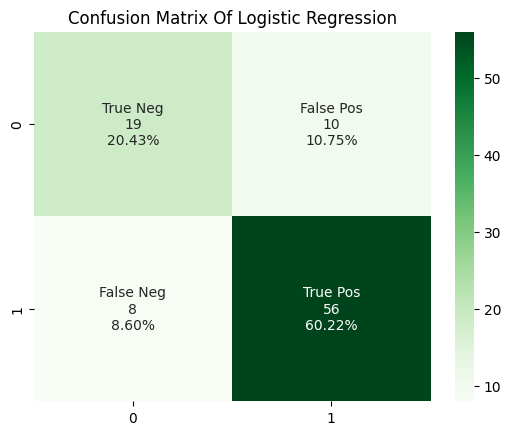

In [15]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_logistic.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_logistic.flatten() / np.sum(confusion_matrix_logistic)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
 
sns.heatmap(confusion_matrix_logistic, annot=labels, fmt="", cmap="Greens")
plt.title("Confusion Matrix Of Logistic Regression")
plt.savefig("../reports/figures/confusion_matrix_logistic_regression_improved.png", dpi=300)

plt.show()


<h3>2- Use of other models </h3>

In [16]:
from sklearn.ensemble import RandomForestClassifier

forset_model = RandomForestClassifier(random_state=0)

forset_model.fit(X_train_norm,y_train)
score = forset_model.score(X_valid,y_valid)
print(f'Model Score: {score}')

Model Score: 0.6747967479674797


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [17]:
param_grid_random_forest = {
    "n_estimators": [100,200],
    "max_depth": [5,10,15] ,
    "min_samples_split" : [2,5,10],
    "min_samples_leaf": [1,2,4],
    "max_features": ['sqrt','log2'] ,
    "class_weight": [{0: w, 1: 1-w} for w in np.arange(.6,.8 , .05)]   
}

In [18]:
def custom_score(y_true , y_pred):
    precision = precision_score(y_true , y_pred , zero_division=0)
    recall = recall_score(y_true , y_pred , zero_division=0)
    return .7 * precision + .3 * recall

forest_custom_score = make_scorer(custom_score)

In [19]:
from sklearn.model_selection import GridSearchCV

grid_search_random_forest = GridSearchCV(
    forset_model,
    param_grid= param_grid_random_forest,
    cv=5,
    scoring=forest_custom_score,
    verbose=True,
    n_jobs=-1
)

In [20]:
grid_search_random_forest.fit(X_train_norm,y_train_binary)

valid_score_1 = grid_search_random_forest.score(X_valid_norm, y_valid_binary)

print("best score of train set: " + str(grid_search_random_forest.best_score_))
print("best parameter set: " + str(grid_search_random_forest.best_params_))
print("validation score: " + str(valid_score_1))

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/s

best score of train set: 0.8419740961652726
best parameter set: {'class_weight': {0: np.float64(0.6), 1: np.float64(0.4)}, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
validation score: 0.8157167332952598


/home/nima/data_science/Pandas&Numpy&Statistic/venv/lib/python3.12/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [21]:
y_pred_logistic = grid_search_random_forest.best_estimator_.predict(X_valid_norm)

In [22]:
from sklearn.metrics import precision_score , recall_score , f1_score

precision_log = precision_score(y_valid_binary, y_pred_logistic )
recall_log = recall_score(y_valid_binary , y_pred_logistic)

#f1_log
valid_score_2 = f1_score(y_valid_binary , y_pred_logistic)


print(f'validation_precision_score: {precision_log:.3f}')
print(f'validation_recall score: {recall_log:.3f}')
print(f'validation_F-1 score: {valid_score_2:.3f}')

validation_precision_score: 0.767
validation_recall score: 0.929
validation_F-1 score: 0.840


In [23]:
progress = valid_score_2 - valid_score_1

print(f'model progress on validation data: {progress}')

model progress on validation data: 0.02470879861963382


In [24]:
y_pred_logistic = grid_search_random_forest.best_estimator_.predict(X_test_norm)


In [25]:
precision_log = precision_score(y_test_binary, y_pred_logistic )
recall_log = recall_score(y_test_binary , y_pred_logistic)

#f1_log
f1_log= f1_score(y_test_binary , y_pred_logistic)


print(f'test_precision_score: {precision_log:.3f}')
print(f'test_recall score: {recall_log:.3f}')
print(f'test_F-1 score: {f1_log:.3f}')

test_precision_score: 0.840
test_recall score: 0.984
test_F-1 score: 0.906


In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix_forest = confusion_matrix(y_test_binary , y_pred_logistic)

<h3>Analysis of Randon Forest Classifier</h3>


As expected, the Random Forest Classifier demonstrated strong performance. According to the chart, the overall model accuracy is approximately 88%, which is considered acceptable. Additionally, the False Positive (FP) rate decreased by about 1% compared to other models (results obtained from Grid Search), indicating the model’s superior predictive capability.
 
As previously mentioned, models with higher complexity and a larger number of parameters, such as ANN and Random Forest, can achieve better accuracy on larger datasets. Therefore, once a larger dataset becomes available, it is recommended that, in addition to the selected Logistic Regression model, these models also be evaluated to assess their performance.

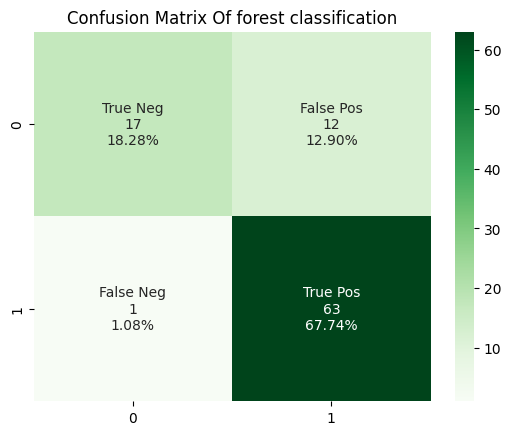

In [27]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_forest.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_forest.flatten() / np.sum(confusion_matrix_forest)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
 
sns.heatmap(confusion_matrix_forest, annot=labels, fmt="", cmap="Greens")
plt.title("Confusion Matrix Of forest classification")
plt.savefig("../reports/figures/confusion_matrix_forest_classification.png", dpi=300)

plt.show()